In [ ]:
chr7	ENSG00000243566.2	76588651	2.994501e-23	0.005126	0.158643	96.909364	99.671538
chr10	ENSG00000151640.8	134000824	4.469902e-09	0.005126	0.002325	30.666923	33.446047
chr11	ENSG00000110455.9	44119312	6.446956e-07	0.007418	0.002325	20.835749	23.563137
chr1	ENSG00000122497.13	148009710	8.996571e-06	0.017448	0.002846	15.585784	18.330716
chr15	ENSG00000184206.7	84972753	1.404656e-05	0.005126	0.002325	14.640695	17.428187
***chr21	ENSG00000243440.2	15938851	1.448429e-05	0.007932	1.000000	14.620592	17.382766
chr4	ENSG00000189308.6	83938708	0.004710	0.009803	1.000000	3.482256	6.235846

In [1]:
##This script will plot genotypes vs expression for a given gene and variant SNP or STR position
##You have to know which chromosome the pair (gene-var) belongs to.
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

#ch='chr1'; gene='ENSG00000122497.13' ; var_snp=148023502 ; var_str=148009710
#ch='chr15'; gene='ENSG00000184206.7' ; var_snp=84855587 ; var_str=84972753
ch='chr21'; gene='ENSG00000160213.5' ; var_str=45196326 ; var_snp=45214684 #45246268


snp=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/SNP_Analysis/SNP_Genochr21", sep='\t') #snps
#snp=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/STR_Norm_Gen.chr17", sep='\t') #plot 2 strs @ time
srt=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/STR_Norm_Gen.chr21", sep='\t')
expr=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Cells-Transformedfibroblasts/Corr_Expr.csv",sep=',' )
print(snp.shape, ' ', srt.shape,' ',expr.shape)
samples=list(expr.index)
data=expr[gene]
genotype_snp = snp.loc[snp['start']==var_snp,samples]
genotype_str=srt.loc[srt['start']==var_str,samples]
print(np.count_nonzero(genotype_snp.values=='None'), '\n', np.count_nonzero(genotype_str.values=='None'),'\n', len(data))
print(genotype_snp.shape, genotype_str.shape)
c=genotype_str.shape[1]
genotype_str = genotype_str.replace('None', np.nan)
genotype_snp = genotype_snp.replace('None', np.nan)
x =  range(1,c+1,1)


/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,7,8,10,12,13,14,15,18,22,24,25,28,30,31,32,33,34,35,36,37,38,40,42,47,48,50,62,67,69,72,76,77,78,79,81,82,93,98,110,118,122,128,133,134,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(97872, 150)   (9177, 150)   (127, 25222)
0 
 5 
 127
(1, 127) (1, 127)


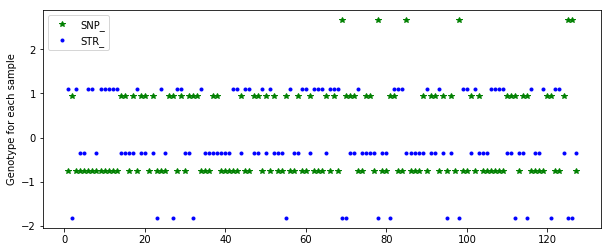

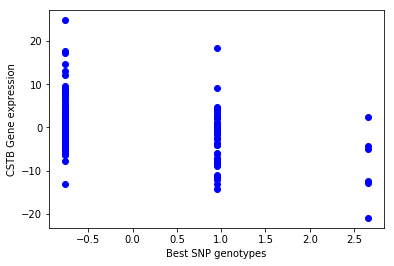

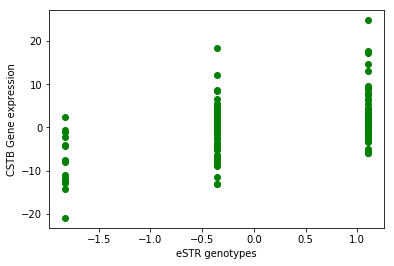

-0.762916567481
0.947866038385
2.65864864425


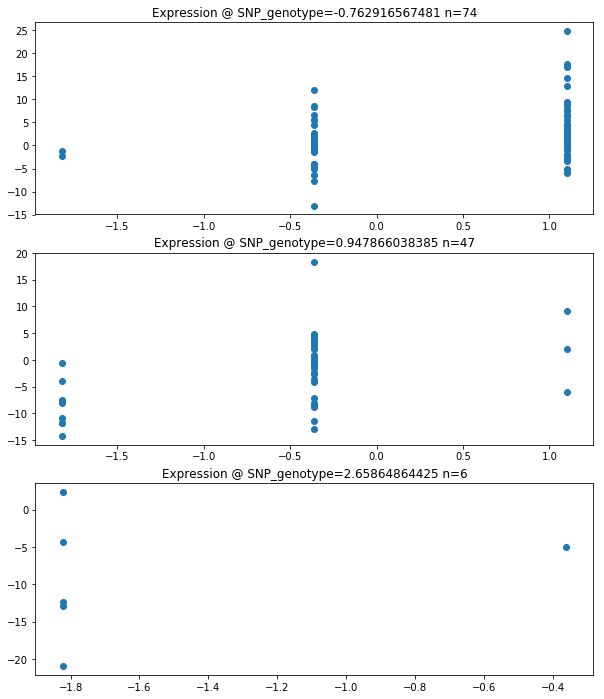

In [9]:
fig=plt.figure(figsize=(10,4))
#ax1 = fig.add_subplot(111)
plt.plot(x,genotype_snp.values.T.tolist(), '*', c='g',label='SNP_')
plt.plot(x,genotype_str.values.T.tolist(),'.', c='b', label='STR_')
plt.legend(loc='upper left')
plt.ylabel('Genotype for each sample')
plt.show()
plt.scatter(genotype_snp, data, label='Lead SNP', color='b')
plt.ylabel('CSTB Gene expression')
plt.xlabel('Best SNP genotypes')
plt.show()
plt.scatter(genotype_str, data,label='eSTR', color='g')
plt.ylabel('CSTB Gene expression')
plt.xlabel('eSTR genotypes')
plt.show()

##Hold snp genotypes constant
geno=list(set(genotype_snp.values.tolist()[0]))
geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
n=len(geno)
ind=genotype_snp.index[0]
fig = plt.figure(figsize=(10, 12)) 
for i in range(len(geno)):
    print(geno[i])
    S=0
    S = genotype_snp.T.loc[genotype_snp.T[ind]==geno[i]]
    sample=list(S.index)
    S['Exp']=data.loc[sample]
    S['Str']=genotype_str.T.loc[sample][genotype_str.index[0]]
    if len(S['Exp'])==0:
        continue
    ax = fig.add_subplot(n,1,1+i)
    ax.scatter(list(S['Str']), list(S['Exp']))
    ax.title.set_text(Gene+' Expression @ SNP_genotype='+str(geno[i])+'   (n='+str(len(S['Exp']))+')')
plt.show()